In [1]:
import pyfiles.HFSAnalyzer as HFSA
reload(HFSA)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
sns.set_style('white')
sns.set_palette('colorblind')
%matplotlib inline

df = HFSA.directory_to_df()
df = df.sort_values(by='Nk')

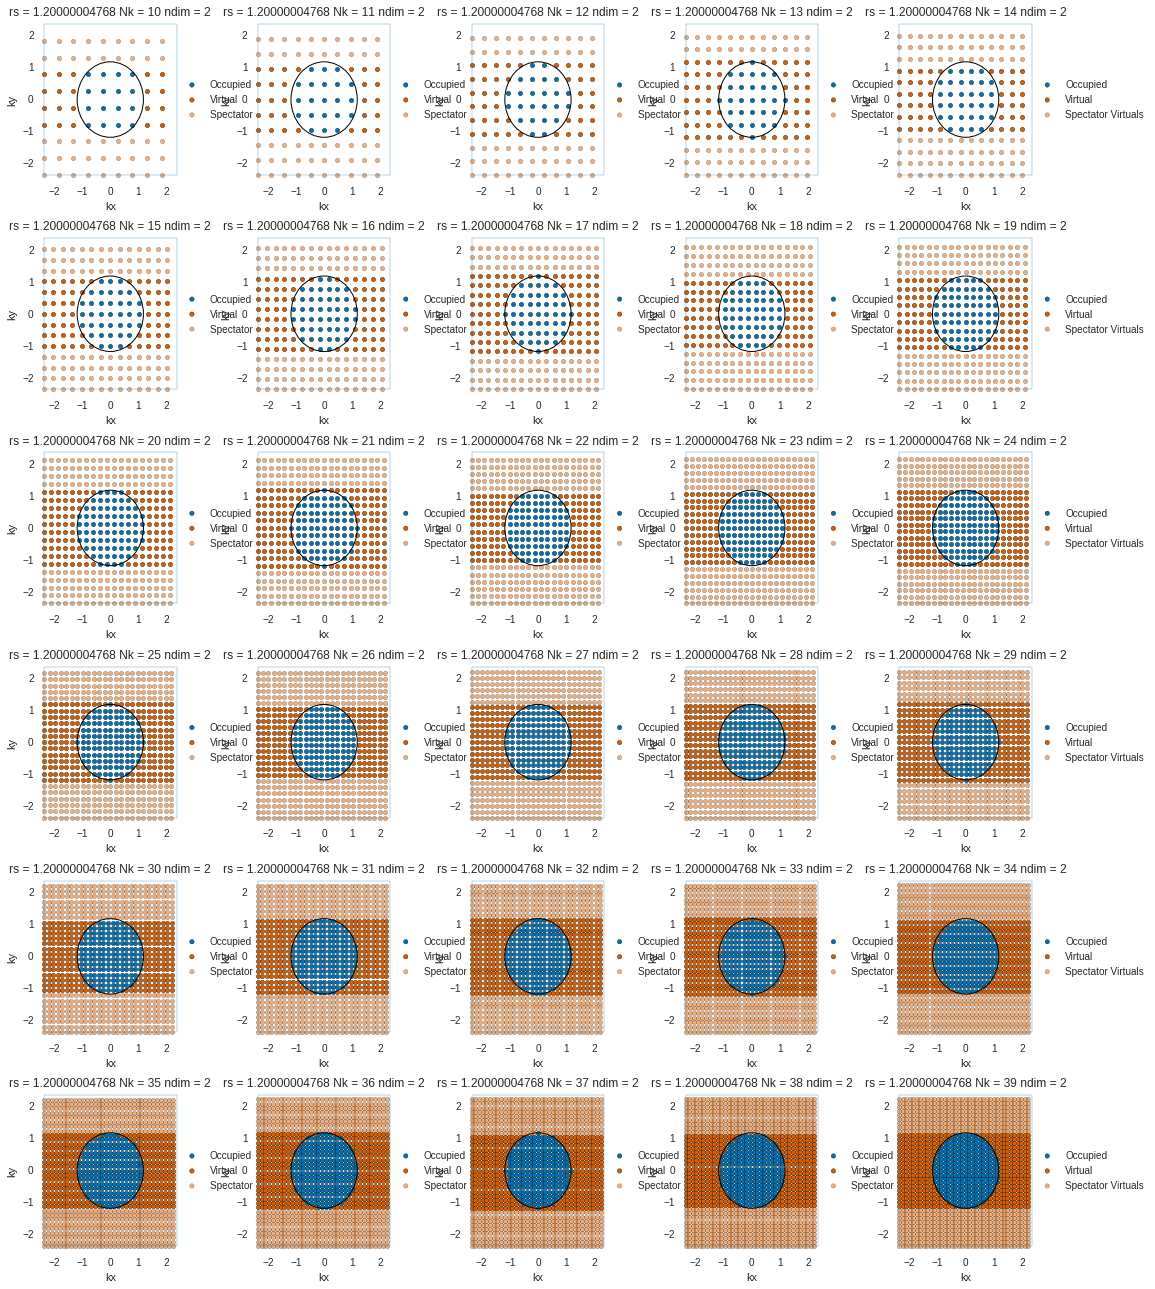

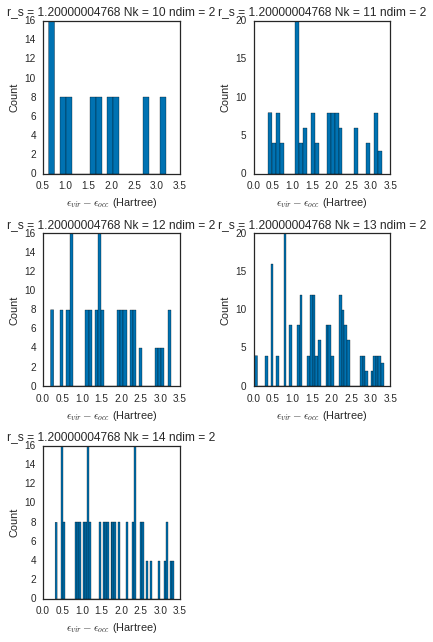

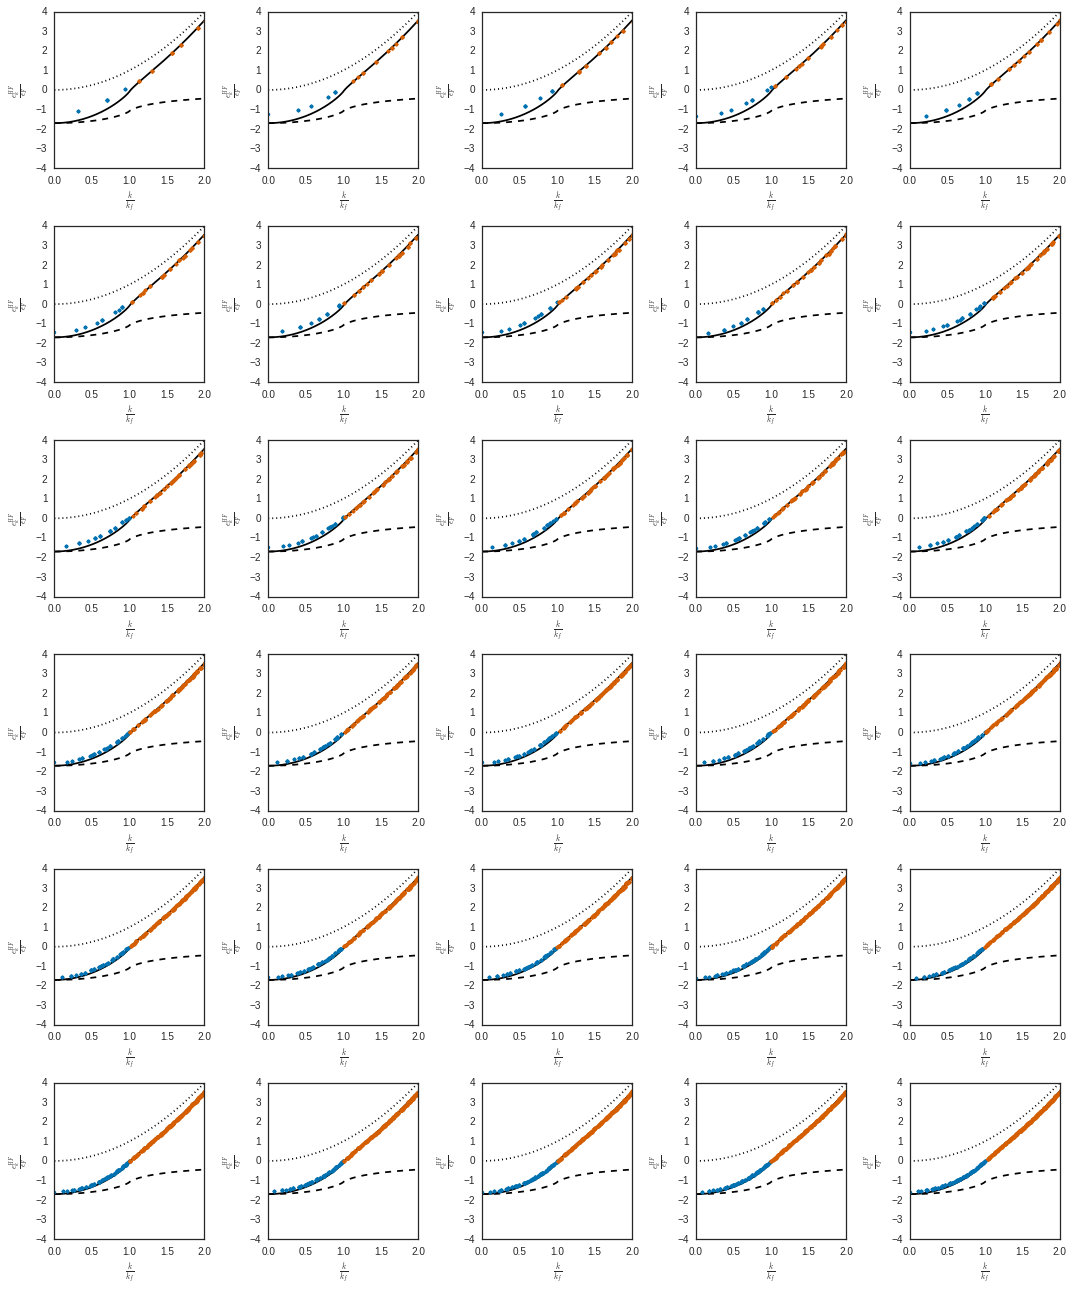

In [21]:

fig = plt.figure()
axplot = HFSA.axplot_1stBZ
kwargs = {'spec_alpha' : 0.5 , 'scale' : 1.05, 'labels' : True}
fig, axes = HFSA.df_ApplyAxplotToRows(df, None, axplot, **kwargs)
plt.tight_layout()
plt.show()

fig = plt.figure()
axplot = HFSA.axplot_exc_hist
fig, axes =  HFSA.df_ApplyAxplotToRows(df[:5], None, axplot)
plt.tight_layout()
plt.show()

plt.figure()
HFSA.df_ApplyAxplotToRows(df, None, HFSA.axplot_energy_compare)
plt.tight_layout()
plt.show()


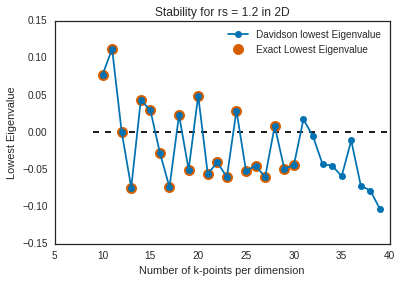

In [3]:
fig = plt.figure()
HFSA.plot_dav_vs_full(df)
plt.show()

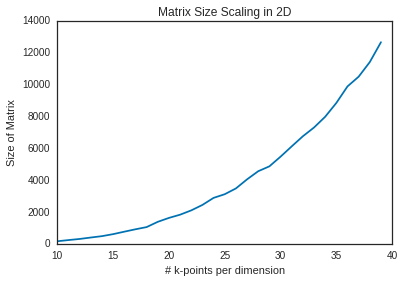

In [4]:
plt.figure()
Nexcs = df.Nexc.as_matrix()
Nks = df.Nk.as_matrix()
plt.plot(Nks, 2*Nexcs)
plt.xlabel('# k-points per dimension')
plt.ylabel('Size of Matrix')
plt.title('Matrix Size Scaling in 2D')
plt.show()

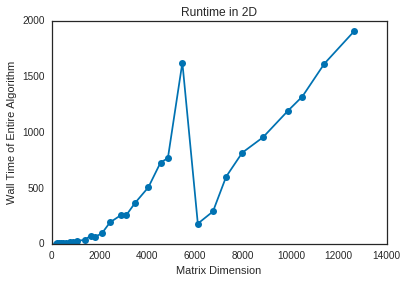

In [5]:
Walltime = [float(s.split()[0]) for s in df['Total Elapsed Time']]
Nexcs = df.Nexc.as_matrix()
plt.title('Runtime in 2D')
plt.xlabel('Matrix Dimension')
plt.ylabel('Wall Time of Entire Algorithm')
plt.plot(2*Nexcs, Walltime, 'o-')
plt.show()

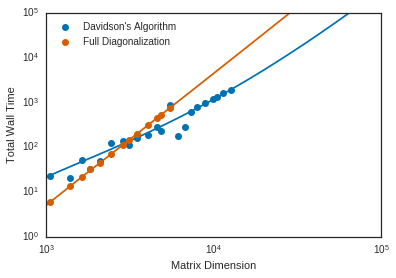

In [6]:
Nmat = 2 * df.Nexc.as_matrix()
Davtimes =  df.Dav_time.as_matrix()

df_with_fulldiags = df[df['full_diag_min'].notnull()]
fulltimes = df_with_fulldiags.full_diag_time.as_matrix()
Nmatfull = 2 * df_with_fulldiags.Nexc.as_matrix()

c = np.polyfit(Nmatfull, fulltimes, 3)
cdav = np.polyfit(Nmat, Davtimes, 3)


xmax = 1e5
xmin = 1e3
Nfit = np.linspace(xmin, xmax, 500)
fit = Nfit**3 * c[0] + Nfit**2 * c[1] + Nfit * c[2] + c[3]
davfit = Nfit**3 * cdav[0] + Nfit**2 * cdav[1] + Nfit * cdav[2] + cdav[3]

fig = plt.figure()
plt.plot(Nmat, Davtimes, 'o', label="Davidson's Algorithm", c=sns.color_palette()[0])
plt.plot(Nfit, davfit, c=sns.color_palette()[0])
plt.plot(Nmatfull, fulltimes, 'o', label='Full Diagonalization', c=sns.color_palette()[2])
plt.plot(Nfit, fit, c=sns.color_palette()[2])
plt.xlabel('Matrix Dimension')
plt.ylabel('Total Wall Time')
plt.legend(loc='best')
ax = plt.gca()
ax.set_xlim([xmin, xmax])
ax.set_ylim([1e-0, 1e5])
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

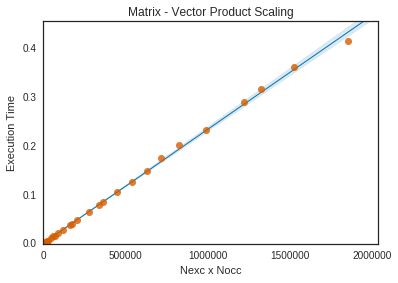

In [7]:
plt.figure()
Nexcs = df['Nexc']
Noccs = df['Nocc']
mvtimes = df['Mv_time']


plt.title('Matrix - Vector Product Scaling')

sns.regplot(Nexcs*Noccs, mvtimes, scatter_kws={'color' : sns.color_palette()[2], 's' : 50, 'zorder' : 2}
                                , line_kws={'zorder' : 1, 'linewidth' : 1})
plt.xlabel('Nexc x Nocc')
plt.ylabel('Execution Time')
ax = plt.gca()
scale = 1.1
ax.set_xlim(0, np.amax(Nexcs * Noccs)*scale)
ax.set_ylim(0, np.amax(mvtimes)*scale)
plt.show()

000001.200_00013_2_sBVoef    13
000001.200_00017_2_3tjF0r    17
000001.200_00021_2_5PHimZ    21
000001.200_00025_2__jE65b    25
000001.200_00029_2_3yxiFE    29
000001.200_00033_2_5TzdGL    33
000001.200_00037_2_1c1gB9    37
Name: Nk, dtype: int64


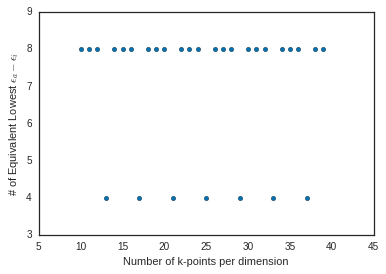

In [8]:
plt.figure()
degen = df['ground_state_degeneracy']
Nks = df.Nk.as_matrix()
plt.scatter(Nks, degen, c=sns.color_palette()[0])
plt.ylabel('# of Equivalent Lowest $\epsilon_a - \epsilon_i$')
plt.xlabel('Number of k-points per dimension')
print df[(df['ground_state_degeneracy'] == 4)].Nk
plt.show()

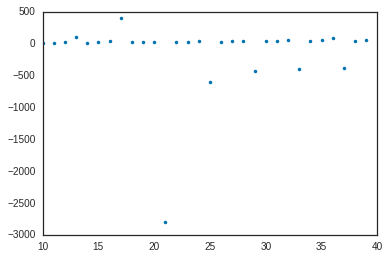

In [9]:
plt.figure()
plt.plot(df['Nk'], df['cond_number'], '.')
plt.show()

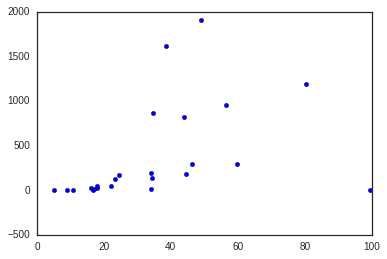

In [10]:
plt.figure()
plt.scatter(df['cond_number'], df['Dav_time'])
plt.gca().set_xlim(0,100)
plt.show()

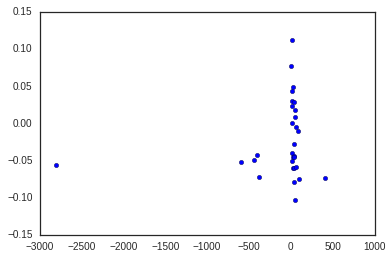

In [11]:
plt.figure()
plt.scatter(df.cond_number, df.Dav_final_val)
plt.show()

In [32]:
for idx, i in enumerate(df['Excitation Energies'].as_matrix()):
    nk = df.iloc[idx]['Nk']
    kgrid = df.iloc[idx]['Kgrid']
    minidx = np.argmin(i)
    minexc = i[minidx]
    kf = df.iloc[idx]['kf']
    if minexc < 0.0:
        occ_states = df.iloc[idx]['Occupied States']
        vir_states = df.iloc[idx]['Virtual States']
        occidx, viridx =  df.iloc[idx]['Excitations'][minidx]
        kocc = kgrid[occ_states[occidx]]
        kvir = kgrid[vir_states[viridx]]
        print kf, kocc, np.linalg.norm(kocc), kvir, np.linalg.norm(kvir) 

1.17851125515 [ 0.         -1.17851126] 1.17851125515 [-0.23570225 -1.17851126] 1.2018503774
1.17851125515 [ 0.          1.17851126] 1.17851125515 [ 0.19641854  1.17851126] 1.19476735072
1.17851125515 [ 0.          1.17851126] 1.17851125515 [ 0.16835875  1.17851126] 1.19047614317
1.17851125515 [ 0.          1.17851126] 1.17851125515 [ 0.14731391  1.17851126] 1.18768268728
1.17851125515 [ 0.         -1.17851126] 1.17851125515 [ 0.1309457  -1.17851126] 1.18576370055


000001.200_00010_2_DSFJ1S    [[15, 24], [12, 21], [3, 24], [15, 53], [0, 21...
000001.200_00011_2_Ef75BA    [[13, 55], [17, 56], [7, 56], [3, 55], [13, 33...
000001.200_00012_2_e5As3t    [[6, 45], [17, 46], [12, 45], [17, 63], [11, 4...
000001.200_00013_2_sBVoef    [[17, 70], [11, 69], [17, 58], [11, 57], [17, ...
000001.200_00014_2_PCnZxC    [[27, 57], [22, 56], [22, 93], [4, 56], [9, 57...
000001.200_00015_2_gQI3OO    [[8, 101], [28, 102], [14, 102], [22, 101], [8...
000001.200_00016_2_KIu13Q    [[29, 110], [22, 109], [21, 110], [14, 109], [...
000001.200_00017_2_3tjF0r    [[20, 103], [28, 104], [28, 120], [20, 119], [...
000001.200_00018_2_i7mzEc    [[10, 150], [17, 151], [34, 150], [41, 151], [...
000001.200_00019_2_WFFzmY    [[48, 108], [56, 109], [56, 165], [48, 164], [...
000001.200_00020_2_Zfg8aG    [[48, 175], [18, 175], [48, 128], [57, 176], [...
000001.200_00021_2_5PHimZ    [[35, 159], [45, 160], [45, 180], [35, 179], [...
000001.200_00022_2_tdwwaU    [[73, 148], [64, 147], 